# Lab2

## Artyom Iudin BVT2101

# Chapters <a class="anchor" id="chapters"></a>
0. [Import](#import)
1. [Tail of CSV](#tail)
2. [How many rows and how many unique item names](#item_name)
3. [Is there null values?](#null_val)
4. [Price column](#price_col)
5. [Top 5 items](#top_five)
6. [One chicken bowl](#chicken_bowl)
7. [Mean price for order and mean quantity](#order_id)
8. [Only 1 quantity in order](#one_quantity)
9. [Most popular item name](#most_popular_item)
10. [Self-made DataFrame](#df_np)
11. [Hist plots](#hists)
12. [Sum dependece of days](#plot)
13. [Scatter plot](#scatter)
      1. In general
      2. Per order

# 0. [Import](#chapters) <a class="anchor" id="import"></a>

In [1]:
import numpy as np              # for 10 task
import pandas as pd
import matplotlib.pyplot as plt # for 11 task

# 1. [Tail of CSV](#chapters) <a class="anchor" id="tail"></a>

In [3]:
df = pd.read_csv('../datasets/data.csv')
df.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


# 2. [How many rows and how many unique item names](#chapters) <a class="anchor" id="item_name"></a>

In [3]:
print(f"There are {df.order_id.value_counts().count()} sales in the table")

There are 1834 sales in the table


In [4]:
print(f"There are {df.item_name.value_counts().count()} unique sales")

There are 50 unique sales


# 3. [Is there null values?](#chapters) <a class="anchor" id="null_val"></a>

In [5]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In 'choice_description'

In [6]:
df.fillna({'choice_description':""}, inplace=True)

In [7]:
df.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

# 4. [Price column](#chapters) <a class="anchor" id="price_col"></a>

In [8]:
print(f"Price column type is {df['item_price'].dtype}")

Price column type is object


It is object (string)

In [9]:
df['prices'] = df['item_price'].replace('[\$,]', '', regex=True).astype(float)
np.random.seed(42)
df.sample(10)

,order_id,quantity,item_name,choice_description,item_price,prices
721,298,1,6 Pack Soft Drink,[Nestea],$6.49,6.49
501,210,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.25,11.25
1586,642,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Black Beans, Chees...",$9.25,9.25
871,360,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Sour Cream,...",$11.25,11.25
2144,864,1,Steak Soft Tacos,"[Fresh Tomato Salsa, [Sour Cream, Cheese, Lett...",$11.75,11.75
2301,924,1,Chips and Roasted Chili-Corn Salsa,,$2.39,2.39
4353,1738,1,Chicken Burrito,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",$8.75,8.75
2522,1002,1,Side of Chips,,$1.69,1.69
4521,1798,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Guacamole, Lettuce...",$11.25,11.25
1487,604,1,Canned Soft Drink,[Coke],$1.25,1.25


In [10]:
prices_stats = df['prices'].describe()
print(f"Mean price = {prices_stats['mean']:.2f},\
 min = {prices_stats['min']}, max = {prices_stats['max']}")

Mean price = 7.46, min = 1.09, max = 44.25


In [11]:
df.drop('item_price', axis='columns', inplace=True)
np.random.seed(42)
df.sample(10)

,order_id,quantity,item_name,choice_description,prices
721,298,1,6 Pack Soft Drink,[Nestea],6.49
501,210,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.25
1586,642,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Black Beans, Chees...",9.25
871,360,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Sour Cream,...",11.25
2144,864,1,Steak Soft Tacos,"[Fresh Tomato Salsa, [Sour Cream, Cheese, Lett...",11.75
2301,924,1,Chips and Roasted Chili-Corn Salsa,,2.39
4353,1738,1,Chicken Burrito,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",8.75
2522,1002,1,Side of Chips,,1.69
4521,1798,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Guacamole, Lettuce...",11.25
1487,604,1,Canned Soft Drink,[Coke],1.25


# 5. [Top 5 items](#chapters) <a class="anchor" id="top_five"></a>

In [12]:
df_without_dub = df.drop_duplicates(['choice_description'])
df_without_dub = df_without_dub.sort_values(['prices'])

print('Топ 5 самых дешёвых')
print(df_without_dub[['choice_description', 'prices']].head(5))
print('Топ 5 самых дорогих')
print(df_without_dub[['choice_description', 'prices']].tail(5))

Топ 5 самых дешёвых
    choice_description  prices
117  [Diet Dr. Pepper]    1.09
126        [Coca Cola]    1.09
28        [Dr. Pepper]    1.09
346         [Lemonade]    1.25
263             [Coke]    1.25
Топ 5 самых дорогих
                                     choice_description  prices
2954  [[Tomatillo-Green Chili Salsa (Medium), Roaste...   22.96
4427  [Fresh Tomato Salsa, [Rice, Pinto Beans, Sour ...   23.50
1753  [Tomatillo Green Chili Salsa, [Fajita Vegetabl...   23.50
3334  [Tomatillo Green Chili (Medium), [Rice, Black ...   26.07
409   [[Fresh Tomato Salsa (Mild), Tomatillo-Green C...   32.94


# 6. [One chicken bowl](#chapters) <a class="anchor" id="chicken_bowl"></a>

In [13]:
print(f"There are\
 {df[(df['item_name'] == 'Chicken Bowl') & (df['quantity'] > 1)].quantity.count()}\
 chicken bowl orders")

There are 33 chicken bowl orders


# 7. [Mean price for order and mean quantity](#chapters) <a class="anchor" id="order_id"></a>

In [14]:
print(f"Mean price for order is {df.groupby('order_id').prices.sum().mean():.2f} $,\
 mean quantity for order is {df.groupby('order_id').quantity.sum().mean():.0f}")

Mean price for order is 18.81 $, mean quantity for order is 3


# 8. [Only 1 quantity in order](#chapters) <a class="anchor" id="one_quantity"></a>

In [15]:
print(f"There are\
 {(df.groupby('order_id').quantity.sum() == 1).sum()} orders with only 1 quantity")

There are 56 orders with only 1 quantity


# 9. [Most popular item name](#chapters) <a class="anchor" id="most_popular_item"></a>

In [16]:
print(f"Most popular product is\
 {df.groupby('item_name').quantity.sum().sort_values().index[-1]} with\
 {df.groupby('item_name').quantity.sum().sort_values().iloc[-1]} quantities")


Most popular product is Chicken Bowl with 761 quantities


# 10. [Self-made DataFrame](#chapters) <a class="anchor" id="df_np"></a>

In [17]:
np.random.seed(42)
matrix = np.random.rand(10, 3)
matrix

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184],
       [0.45606998, 0.78517596, 0.19967378],
       [0.51423444, 0.59241457, 0.04645041]])

In [18]:
df_np = pd.DataFrame(data=matrix[:, 1:],
                     columns=['column1', 'column2'],
                     index=matrix[:, 0])

df_np

,column1,column2
0.374540,0.950714,0.731994
0.598658,0.156019,0.155995
0.058084,0.866176,0.601115
0.708073,0.020584,0.969910
0.832443,0.212339,0.181825
0.183405,0.304242,0.524756
0.431945,0.291229,0.611853
0.139494,0.292145,0.366362
0.456070,0.785176,0.199674
0.514234,0.592415,0.046450


In [19]:
df_np.to_csv('./df_np.csv',index=False, header=False)

# 11. [Hist plots](#chapters) <a class="anchor" id="hists"></a>

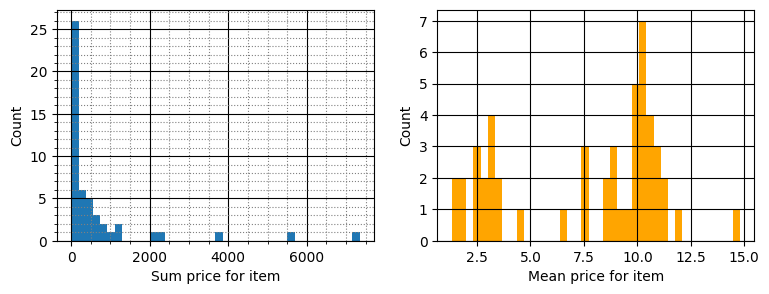

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,3))

df.groupby('item_name').prices.sum().hist(bins=40, ax=ax[0])
df.groupby('item_name').prices.mean().hist(bins=40, ax=ax[1], color='orange')

ax[0].set_xlabel("Sum price for item")
ax[0].set_ylabel("Count")

ax[0].grid(which='major',
        color = 'k')

ax[0].minorticks_on()
ax[0].grid(which='minor',
        color = 'gray',
        linestyle = ':')

ax[1].set_xlabel("Mean price for item")
ax[1].set_ylabel("Count")

ax[1].grid(which='major',
        color = 'k')

# 12. [Sum dependece of days](#chapters) <a class="anchor" id="plot"></a>

Excuse me, what "days"?

# 13. [Price dependecy on quantity](#chapters) <a class="anchor" id="scatter"></a>

## 13.1 [In general](#chapters)

<Axes: xlabel='quantity', ylabel='prices'>

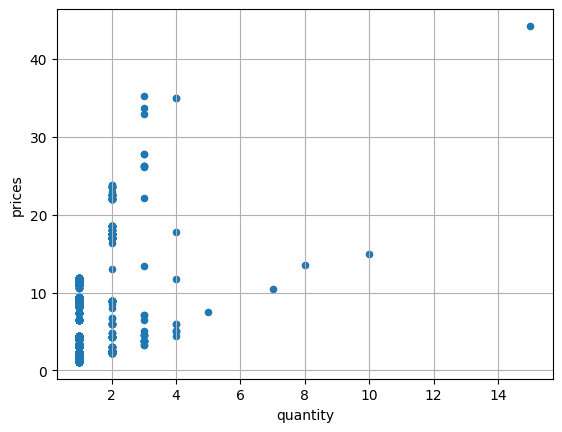

In [21]:
df.plot.scatter(x='quantity', y='prices', grid=True)

## 13.2 [Per order](#chapters)

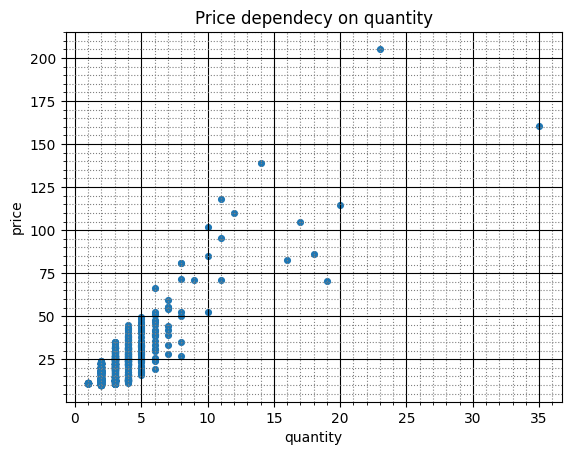

In [22]:
x = df.groupby('order_id').quantity.sum().values
y = df.groupby('order_id').prices.sum().values

plt.scatter(x=x, y=y, s=17)

plt.xlabel("quantity")
plt.ylabel("price")
plt.title('Price dependecy on quantity')

plt.grid(which='major',
        color = 'k')

plt.minorticks_on()
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':')

plt.savefig("./scatter.pdf")